In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# drop nan cloumn
df.drop("bmi",axis=1,inplace=True)

In [4]:
# convert the data to be numeric
df=pd.get_dummies(df,["gender","ever_married","work_type","Residence_type","smoking_status"])

In [5]:
# final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   avg_glucose_level               5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   uint8  
 7   gender_Male                     5110 non-null   uint8  
 8   gender_Other                    5110 non-null   uint8  
 9   ever_married_No                 5110 non-null   uint8  
 10  ever_married_Yes                5110 non-null   uint8  
 11  work_type_Govt_job              5110 non-null   uint8  
 12  work_type_Never_worked          51

In [6]:
# drop ID column
df=df.drop("id",axis=1)

In [7]:
# the balance of the label
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Here we find that there is imbalanced data , so we will try to analyze the data by visualization.

In [8]:
# create another table include only the people who have a stroke
df2=df[df["stroke"]==1]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             249 non-null    float64
 1   hypertension                    249 non-null    int64  
 2   heart_disease                   249 non-null    int64  
 3   avg_glucose_level               249 non-null    float64
 4   stroke                          249 non-null    int64  
 5   gender_Female                   249 non-null    uint8  
 6   gender_Male                     249 non-null    uint8  
 7   gender_Other                    249 non-null    uint8  
 8   ever_married_No                 249 non-null    uint8  
 9   ever_married_Yes                249 non-null    uint8  
 10  work_type_Govt_job              249 non-null    uint8  
 11  work_type_Never_worked          249 non-null    uint8  
 12  work_type_Private               249 

Text(0, 0.5, 'Correlation percentage')

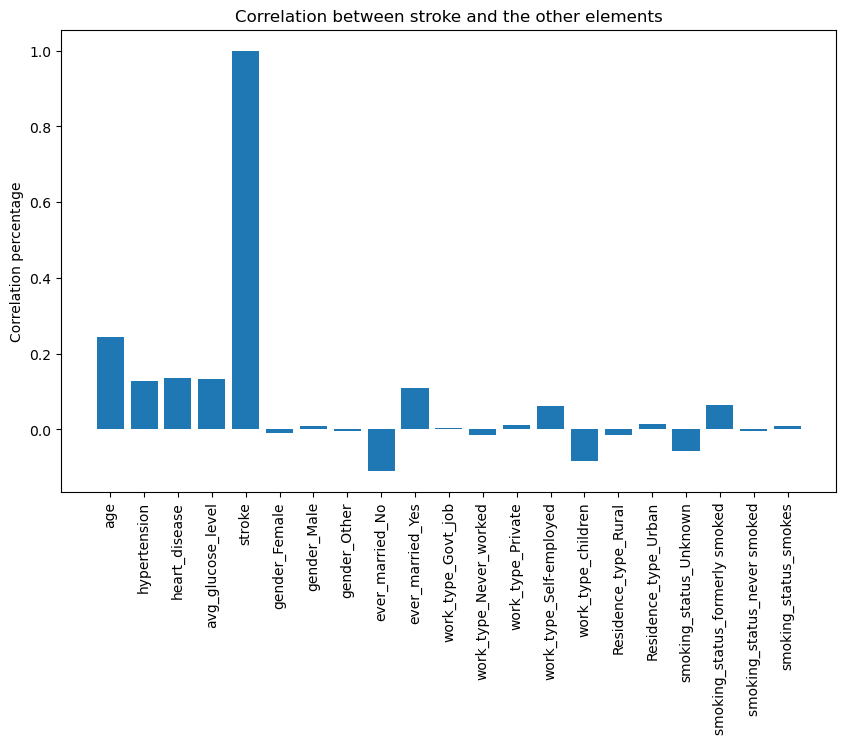

In [9]:
# show up the correlation between the people who have a stroke and other features
fig,ax=plt.subplots(figsize=(10,6))
x=df.corr()["stroke"].index
y=df.corr()["stroke"].values

plt.bar(list(x),list(y))
plt.tick_params(axis="x",labelrotation = 90)
plt.title("Correlation between stroke and the other elements")
plt.ylabel("Correlation percentage")

Text(0, 0.5, 'Count')

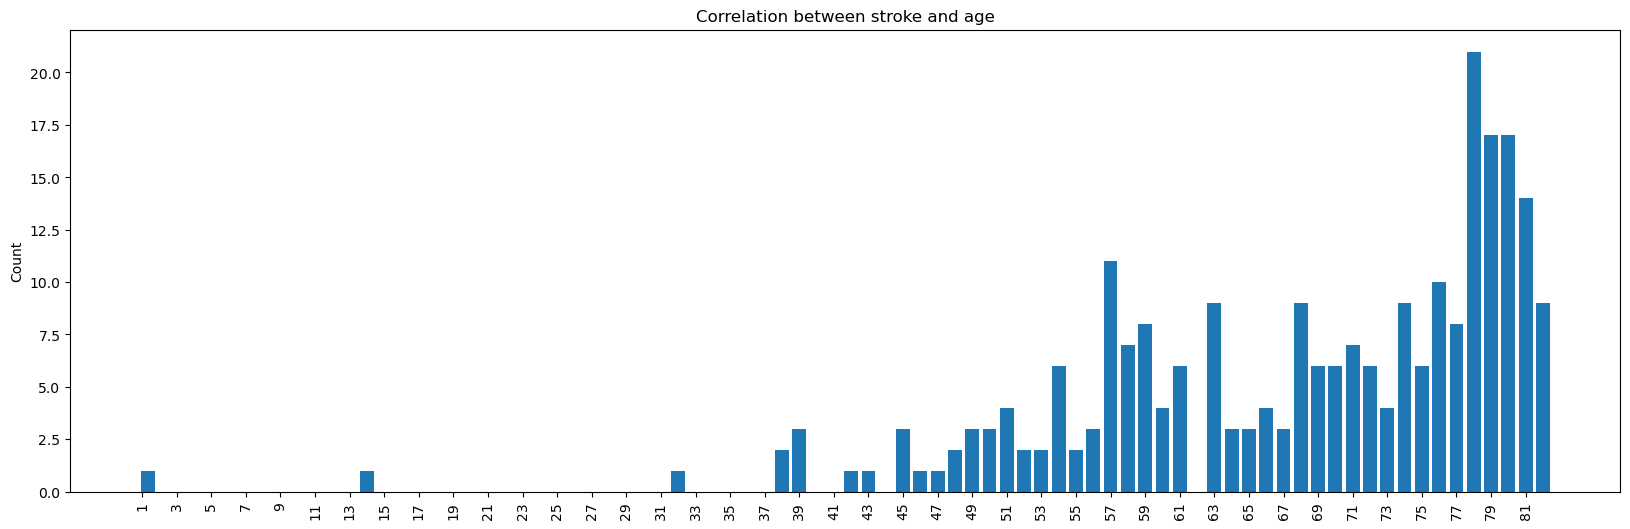

In [10]:
fig,ax=plt.subplots(figsize=(20,6))
x=df2["age"].value_counts().index
y=df2["age"].value_counts().values

plt.bar(list(x),list(y))
plt.tick_params(axis="x",labelrotation = 90)
plt.xticks(np.arange(1, max(x)+1,2))
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title("Correlation between stroke and age")
plt.ylabel("Count")

according to the data we find that all most of people around 69+ may have a stroke

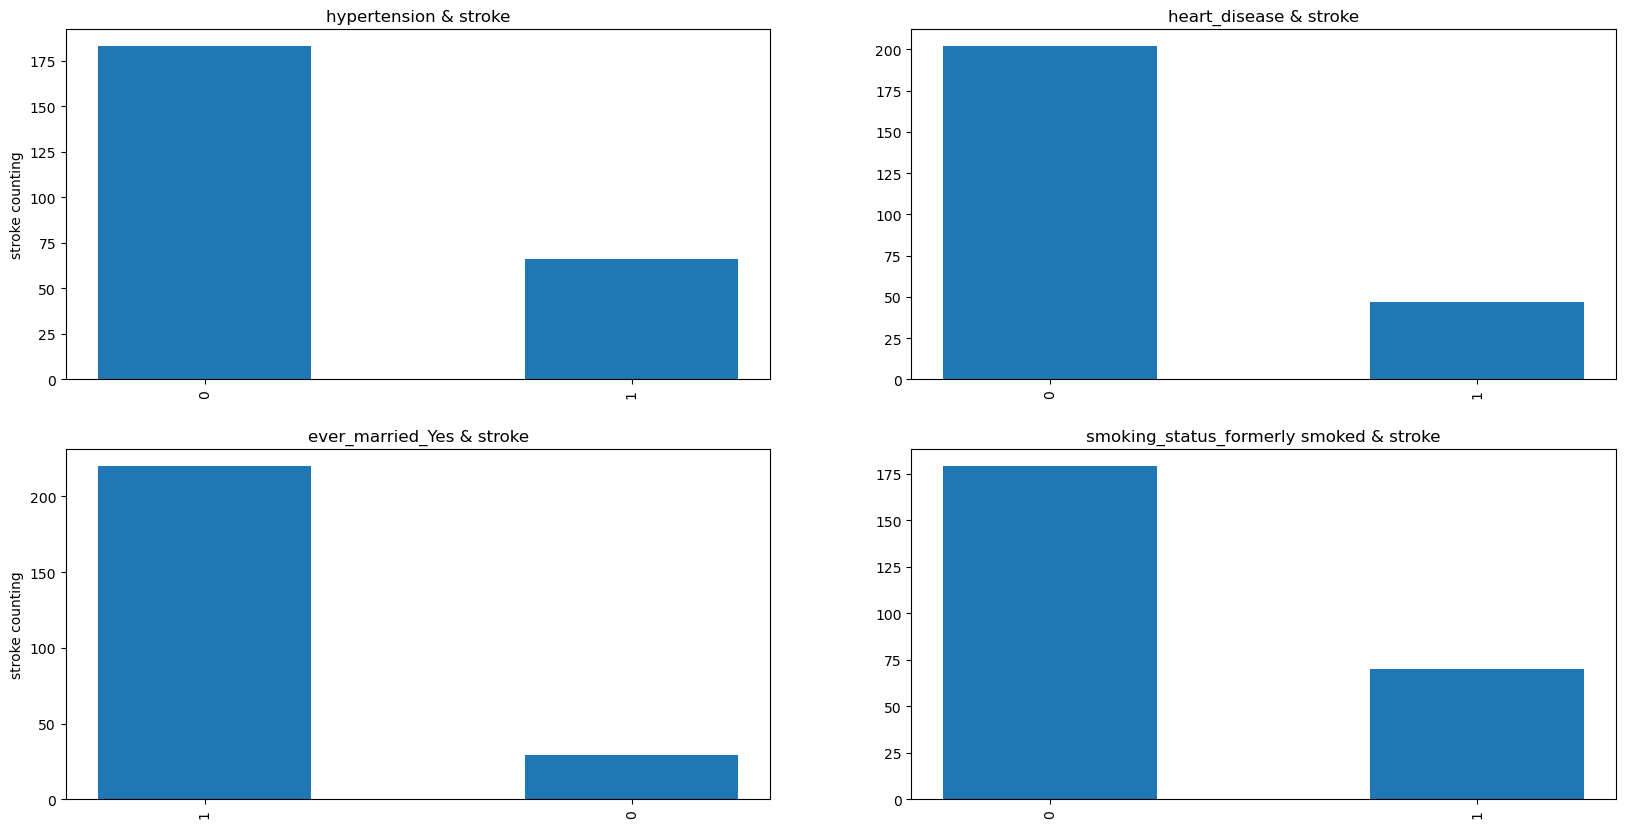

In [11]:
# the releation between stroke and other featsures
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
x=np.array(df2["hypertension"].value_counts().index.astype(str))
y=np.array(df2["hypertension"].value_counts().values)
ax[0,0].bar(x,y,width=.5)
ax[0,0].tick_params(axis='x', labelrotation = 90)
ax[0,0].set_title("hypertension & stroke")
ax[0,0].set_ylabel("stroke counting")
fig.set_figheight(10)

x1=np.array(df2["heart_disease"].value_counts().index.astype(str))
y1=np.array(df2["heart_disease"].value_counts().values)
ax[0,1].bar(x1,y1,width=.5)
ax[0,1].tick_params(axis='x', labelrotation = 90)
ax[0,1].set_title("heart_disease & stroke")
fig.set_figheight(10)

x2=np.array(df2["ever_married_Yes"].value_counts().index.astype(str))
y2=np.array(df2["ever_married_Yes"].value_counts().values)
ax[1,0].bar(x2,y2,width=.5)
ax[1,0].tick_params(axis='x', labelrotation = 90)
ax[1,0].set_title("ever_married_Yes & stroke")
ax[1,0].set_ylabel("stroke counting")
fig.set_figheight(10)

x3=np.array(df2["smoking_status_formerly smoked"].value_counts().index.astype(str))
y3=np.array(df2["smoking_status_formerly smoked"].value_counts().values)
ax[1,1].bar(x3,y3,width=.5)
ax[1,1].tick_params(axis='x', labelrotation = 90)
ax[1,1].set_title("smoking_status_formerly smoked & stroke")
fig.set_figheight(10)


In [12]:
# Import Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [13]:
# get the X,y axis
X=df.drop("stroke",axis=1).values
y=df["stroke"].values

In [14]:
# train and test split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [15]:
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)
M_2_pre_train=model2.predict(x_train)
M_2_pre_test=model2.predict(x_test)

In [16]:
print("Train : ")
print(classification_report(M_2_pre_train,y_train),"\n confusion_matrix : \n",confusion_matrix(M_2_pre_train,y_train))
print("*"*50)
print("test: \n",classification_report(M_2_pre_test,y_test),"\n confusion_matrix : \n",confusion_matrix(M_2_pre_test,y_test))

Train : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4062
           1       0.08      0.58      0.14        26

    accuracy                           0.95      4088
   macro avg       0.54      0.77      0.56      4088
weighted avg       0.99      0.95      0.97      4088
 
 confusion_matrix : 
 [[3888  174]
 [  11   15]]
**************************************************
test: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      1013
           1       0.03      0.22      0.06         9

    accuracy                           0.94      1022
   macro avg       0.51      0.58      0.51      1022
weighted avg       0.98      0.94      0.96      1022
 
 confusion_matrix : 
 [[955  58]
 [  7   2]]


In [17]:
model3=DecisionTreeClassifier(max_depth=15)
model3.fit(x_train,y_train)
M_3_pre_train=model3.predict(x_train)
M_3_pre_test=model3.predict(x_test)

In [18]:
print("Train: \n",classification_report(M_3_pre_train,y_train),"\n confusion_matrix : \n",confusion_matrix(M_3_pre_train,y_train))
print("*"*50)
print("Test: \n",classification_report(M_3_pre_test,y_test),"\n confusion_matrix : \n",confusion_matrix(M_3_pre_test,y_test))

Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3902
           1       0.98      0.99      0.99       186

    accuracy                           1.00      4088
   macro avg       0.99      1.00      0.99      4088
weighted avg       1.00      1.00      1.00      4088
 
 confusion_matrix : 
 [[3898    4]
 [   1  185]]
**************************************************
Test: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       975
           1       0.15      0.19      0.17        47

    accuracy                           0.91      1022
   macro avg       0.56      0.57      0.56      1022
weighted avg       0.92      0.91      0.92      1022
 
 confusion_matrix : 
 [[924  51]
 [ 38   9]]


In [19]:
para={"n_estimators":range(100,111)}
mod=RandomForestClassifier()
model5=GridSearchCV(mod,para)
model5.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(100, 111)})

In [20]:
pd.DataFrame(model5.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.322838,0.004684,0.025005,0.000589,100,{'n_estimators': 100},0.954768,0.949878,0.949878,0.955936,0.948592,0.951810,0.002953,11
1,0.327547,0.003967,0.025658,0.000630,101,{'n_estimators': 101},0.953545,0.954768,0.953545,0.953488,0.951040,0.953277,0.001218,4
2,0.325318,0.003740,0.024891,0.000518,102,{'n_estimators': 102},0.952323,0.953545,0.952323,0.953488,0.948592,0.952054,0.001812,10
3,0.339974,0.011111,0.026038,0.000447,103,{'n_estimators': 103},0.952323,0.953545,0.953545,0.954712,0.951040,0.953033,0.001251,5
4,0.341304,0.004525,0.026378,0.000389,104,{'n_estimators': 104},0.953545,0.953545,0.948655,0.955936,0.951040,0.952544,0.002486,7
5,0.342910,0.011257,0.025997,0.000349,105,{'n_estimators': 105},0.952323,0.953545,0.954768,0.957160,0.951040,0.953767,0.002102,2
6,0.340878,0.004835,0.026394,0.000799,106,{'n_estimators': 106},0.952323,0.949878,0.954768,0.954712,0.951040,0.952544,0.001953,8
7,0.344852,0.003099,0.026806,0.000748,107,{'n_estimators': 107},0.952323,0.953545,0.953545,0.958384,0.951040,0.953768,0.002488,1
8,0.350923,0.004460,0.026575,0.000408,108,{'n_estimators': 108},0.952323,0.949878,0.952323,0.954712,0.951040,0.952055,0.001611,9
9,0.354550,0.005867,0.027562,0.000687,109,{'n_estimators': 109},0.953545,0.954768,0.952323,0.955936,0.949816,0.953278,0.002110,3


In [21]:
Model5_best=model5.best_estimator_
M_5_pre_train=Model5_best.predict(x_train)
M_5_pre_test=Model5_best.predict(x_test)

In [22]:
print("Train: \n",classification_report(M_5_pre_train,y_train),"\nconfusion_matrix: \n",confusion_matrix(M_5_pre_train,y_train))
print("*"*50)
print("Test: \n",classification_report(M_5_pre_test,y_test),"\nconfusion_matrix: \n",confusion_matrix(M_5_pre_test,y_test))

Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       0.99      1.00      1.00       188

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088
 
confusion_matrix: 
 [[3899    1]
 [   0  188]]
**************************************************
Test: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1017
           1       0.02      0.20      0.03         5

    accuracy                           0.94      1022
   macro avg       0.51      0.57      0.50      1022
weighted avg       0.99      0.94      0.96      1022
 
confusion_matrix: 
 [[958  59]
 [  4   1]]


In [23]:
def scores():
    RF=print("Random Forest accuracy score :",accuracy_score(M_5_pre_test,y_test))
    KNN=print("KNeighborsClassifier accuracy score :",accuracy_score(M_2_pre_test,y_test))
    DT=print("DecisionTreeClassifier accuracy score :",accuracy_score(M_3_pre_test,y_test))
    
    return KNN,DT,RF
scores();

Random Forest accuracy score : 0.9383561643835616
KNeighborsClassifier accuracy score : 0.9363992172211351
DecisionTreeClassifier accuracy score : 0.9129158512720157
